In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
automobile =pd.read_csv("AutoData (1).csv")

In [3]:
automobile.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#  Perform EDA on the data¶

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
outliers=[]
catog=[]
for i in automobile.columns:
    if automobile[i].dtypes=='int64' or automobile[i].dtypes=='float64':
        outliers.append(i)
    else:
        catog.append(i)

In [8]:
print(outliers)
print(catog)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


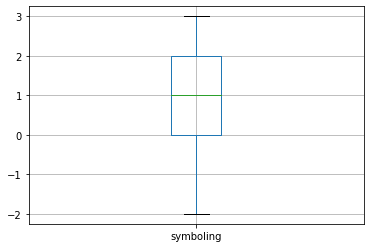

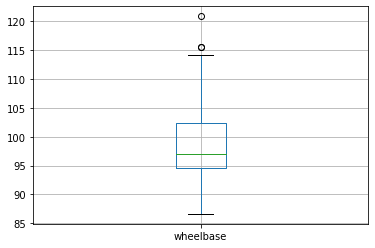

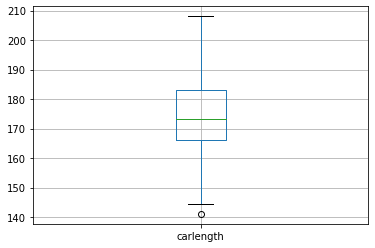

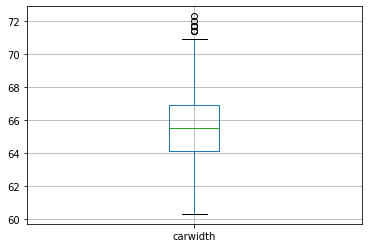

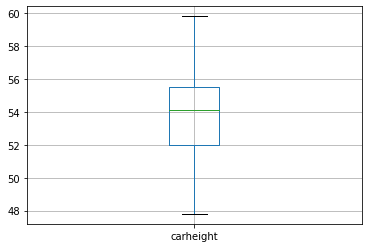

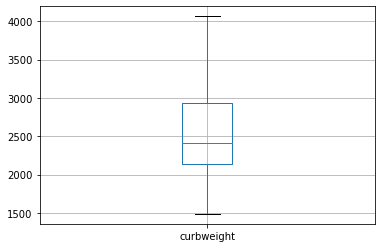

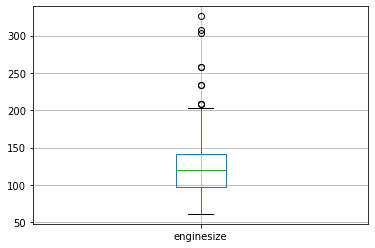

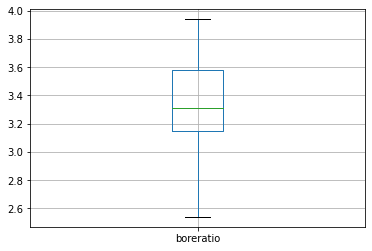

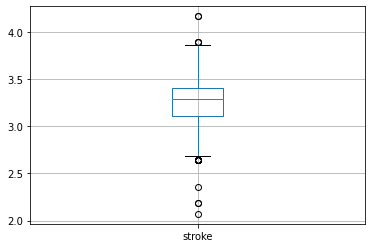

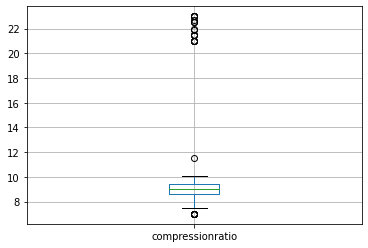

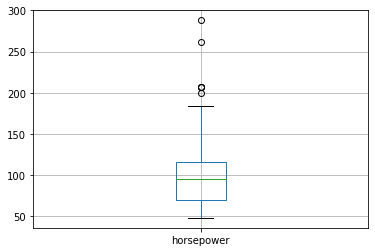

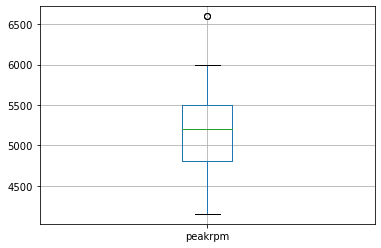

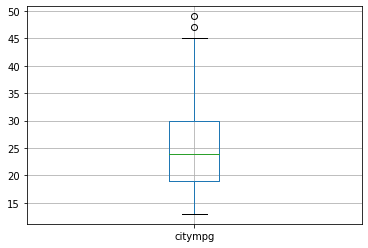

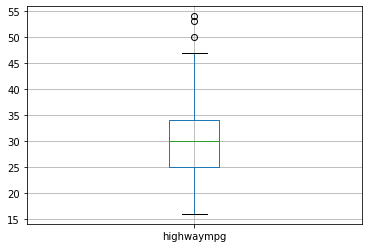

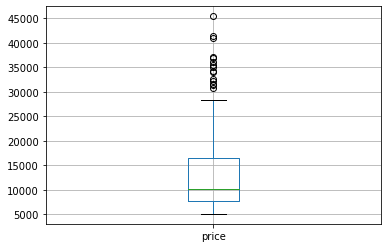

In [10]:
for i in outliers:
    automobile.boxplot(i)
    plt.show()

#  Perform data cleanup as required¶

In [11]:
automobile.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Pick the best variable for making a simple linear regression model¶

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
le=LinearRegression()

In [34]:
le1=LabelEncoder()

In [35]:
automobile1=automobile.apply(le1.fit_transform)
automobile1

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,2,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,118
1,5,3,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,137
2,3,1,1,0,1,2,2,0,10,29,...,28,5,1,28,13,45,10,6,9,137
3,4,4,1,0,0,3,1,0,30,45,...,11,5,13,25,22,27,16,11,13,123
4,4,5,1,0,0,3,0,0,28,45,...,22,5,13,25,5,33,16,5,5,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,139,1,0,0,3,2,0,46,63,...,24,5,35,15,20,32,15,10,11,143
201,1,138,1,1,0,3,2,0,46,63,...,24,5,35,15,11,48,14,6,8,161
202,1,140,1,0,0,3,2,0,46,63,...,33,5,26,7,12,38,16,5,6,165
203,1,142,0,1,0,3,2,0,46,63,...,25,3,6,25,31,28,8,13,10,167


In [49]:
livepreds1=a.argmax(axis=1)

liveabc = livepreds1.astype(int).flatten()
livepredictions = (le1.inverse_transform((liveabc)))

In [53]:
livepreds1

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 23,  1,  1,  1,  1, 24,  1,  1, 24, 24, 12, 24,  1,  1,  1,  1,
        1,  1, 11, 12, 24, 24, 24, 24, 24, 12, 24, 24, 12, 24, 24, 24,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 12, 12, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24,  1,  1,  1,  1, 24, 12, 12, 24, 24,
       12, 12, 12, 12, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 12,
       12, 12, 24, 24, 24, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 24,  1,
        1,  1,  1,  1,  1, 12, 24, 24, 24, 24, 24,  1,  1, 24, 24, 24, 24,
       24, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 24,  1,  1,  1,  1,  1, 24, 24, 12, 12,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 24, 24, 24, 24, 24, 24,
       24], dtype=int64)

In [54]:
livepredictions

array([6849., 6849., 6849., 6849., 6849., 6849., 6849., 6849., 6849.,
       6849., 6849., 6849., 6849., 6849., 6849., 6849., 6849., 6849.,
       6795., 5151., 5151., 5151., 5151., 6849., 5151., 5151., 6849.,
       6849., 6338., 6849., 5151., 5151., 5151., 5151., 5151., 5151.,
       6295., 6338., 6849., 6849., 6849., 6849., 6849., 6338., 6849.,
       6849., 6338., 6849., 6849., 6849., 5151., 5151., 5151., 5151.,
       5151., 6849., 6849., 6849., 6849., 6338., 6338., 6849., 6849.,
       6849., 6849., 6849., 6849., 6849., 6849., 6849., 6849., 6849.,
       6849., 6849., 6849., 6849., 5151., 5151., 5151., 5151., 6849.,
       6338., 6338., 6849., 6849., 6338., 6338., 6338., 6338., 6295.,
       5151., 5151., 5151., 5151., 5151., 5151., 5151., 5151., 5151.,
       5151., 5151., 6338., 6338., 6338., 6849., 6849., 6849., 6338.,
       6338., 6338., 6338., 6338., 6338., 6338., 6338., 6338., 6338.,
       6849., 5151., 5151., 5151., 5151., 5151., 5151., 6338., 6849.,
       6849., 6849.,

In [50]:
a=automobile1.to_numpy()
a

array([[  5,   2,   1, ...,   8,  10, 118],
       [  5,   3,   1, ...,   8,  10, 137],
       [  3,   1,   1, ...,   6,   9, 137],
       ...,
       [  1, 140,   1, ...,   5,   6, 165],
       [  1, 142,   0, ...,  13,  10, 167],
       [  1, 143,   1, ...,   6,   8, 168]], dtype=int64)

In [56]:
automobile1

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,2,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,118
1,5,3,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,137
2,3,1,1,0,1,2,2,0,10,29,...,28,5,1,28,13,45,10,6,9,137
3,4,4,1,0,0,3,1,0,30,45,...,11,5,13,25,22,27,16,11,13,123
4,4,5,1,0,0,3,0,0,28,45,...,22,5,13,25,5,33,16,5,5,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,139,1,0,0,3,2,0,46,63,...,24,5,35,15,20,32,15,10,11,143
201,1,138,1,1,0,3,2,0,46,63,...,24,5,35,15,11,48,14,6,8,161
202,1,140,1,0,0,3,2,0,46,63,...,33,5,26,7,12,38,16,5,6,165
203,1,142,0,1,0,3,2,0,46,63,...,25,3,6,25,31,28,8,13,10,167


In [57]:
a=automobile1.to_numpy()
a

array([[  5,   2,   1, ...,   8,  10, 118],
       [  5,   3,   1, ...,   8,  10, 137],
       [  3,   1,   1, ...,   6,   9, 137],
       ...,
       [  1, 140,   1, ...,   5,   6, 165],
       [  1, 142,   0, ...,  13,  10, 167],
       [  1, 143,   1, ...,   6,   8, 168]], dtype=int64)

In [61]:
model0=le.fit(X,y)
predicted=model0.predict(X)

In [63]:
predicted

array([119.95772725, 119.80197988, 136.54480729, 119.38055524,
       131.57285246, 113.47953849, 147.49563415, 145.62827948,
       170.33944765, 151.42096864, 115.04728379, 119.49375224,
       122.63666739, 132.01322323, 155.58569386, 173.78905666,
       169.02934468, 187.96023108,   8.48785138,  26.65962433,
        31.03867983,  20.78977975,  27.46649473,  64.41082047,
        39.40735779,  36.66465558,  36.82040294,  61.94785684,
        79.4813331 , 112.71099152,   0.93322701,  19.42219418,
        19.31024754,  28.74774575,  29.77884065,  41.50962127,
        36.4974314 ,  52.47346403,  54.83965376,  62.4069758 ,
        63.32501699,  99.57234719,  67.70809159,  57.35728678,
        18.84389051,  27.05343434, 109.81024913, 175.36435366,
       175.52010103, 193.81397496,  22.9735494 ,  22.49975493,
        21.33539709,  28.0319219 ,  28.39735297, 104.5193071 ,
       104.36355973, 103.82219136, 134.17517995,  69.07629168,
        71.80258678,  68.60904958,  71.49109205,  87.88

In [64]:
automobile1['predicted_price']=predicted

In [66]:
automobile1.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,predicted_price
0,5,2,1,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,118,119.957727
1,5,3,1,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,137,119.801980
2,3,1,1,0,1,2,2,0,10,29,...,5,1,28,13,45,10,6,9,137,136.544807
3,4,4,1,0,0,3,1,0,30,45,...,5,13,25,22,27,16,11,13,123,119.380555
4,4,5,1,0,0,3,0,0,28,45,...,5,13,25,5,33,16,5,5,148,131.572852


# Perform train test split¶

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [68]:
model=le.fit(X_train,y_train)

In [69]:
y_pred=model.predict(X_test)

In [70]:
y_pred

array([ 22.45167411, 145.44135575, 108.62289406,   7.76764699,
        80.25552966, 109.46349558,  17.93484125,  30.81711493,
       131.83702391,  27.07315004, 120.57093868, 161.76966573,
       109.70640909, 100.62977509,  20.36401685, 100.42435266,
        78.93556397, 140.0344448 ,  52.68168693,  27.81492907,
        96.12577898, 145.15476706,  79.33220615, 105.92630856,
       150.55757466,  23.28965609,  29.3458445 , 150.14367284,
        40.95254974,  25.2359321 ,  53.92964153,  90.16600346,
       118.63679409,  69.89030081,  24.43187425, 167.45018951,
        64.30227693, 147.91713476,  26.06007635, 191.89844733,
        13.09618318, 121.02697885, 183.13279919, 131.73538611,
        86.20280102,  35.15514144,  31.70504157, 113.85970486,
        86.81295514,  63.65509951, 170.12494901,  25.96621923])

# Build model using best variable and report the R2¶

In [71]:
from  sklearn.metrics import r2_score

In [72]:
r_score=r2_score(y_test,y_pred)

In [73]:
r_score

0.8731176479377712